# Model #2: Testing all sorts of layers

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt #pip install matplotlib
import numpy as np # pip install numpy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D, MaxPool2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import model_from_json


# 1.Load a dataset(sort of)

In [2]:
train_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/train")
test_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop//flavia_for_cnn/test")
val_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/val")


class_names = list([item.name for item in train_dir.glob('*')])
print("Classes:", class_names)


image_generator = ImageDataGenerator(rescale=1./255)

train_generator = image_generator.flow_from_directory(train_dir,
                                                      target_size = (150,150),
                                                      batch_size=8,
                                                      class_mode='categorical',
                                                      shuffle = False)

test_generator = image_generator.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)
val_generator = image_generator.flow_from_directory(val_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)

Classes: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']
Found 523 images belonging to 12 classes.
Found 522 images belonging to 12 classes.
Found 87 images belonging to 12 classes.


# 2.Preprocess dataset

In [3]:
#done already

# 3.Build model

In [4]:
model = Sequential()


model.add(Conv2D(100, (3,3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(100, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())


model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer 3
model.add(Dense(12))
model.add(Activation('softmax'))

# 4.Plot the model as a graph

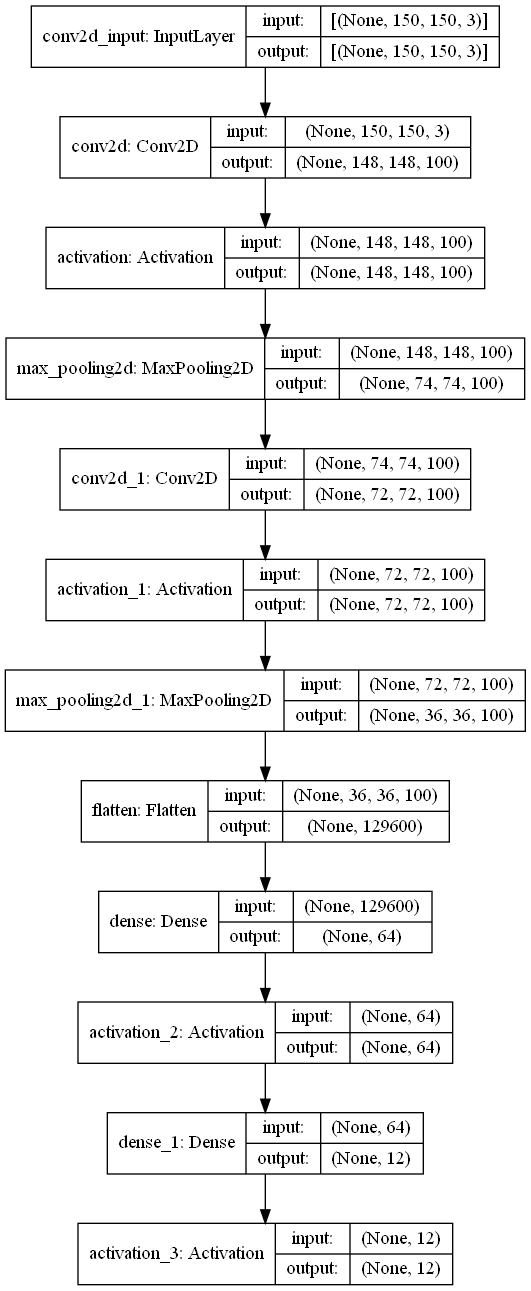

In [5]:
tf.keras.utils.plot_model(model, to_file='model3.png', show_shapes=True)
#pip install pydot

# 5.Compile the model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6.Fit your model


In [7]:
trained = model.fit(train_generator,
                    epochs = 20,
                    verbose = 1,
                    validation_data=val_generator
                    );


Epoch 1/20
66/66 [==============================] - 19s 280ms/step - loss: 2.7473 - accuracy: 0.1052 - val_loss: 2.3689 - val_accuracy: 0.2989
Epoch 2/20
66/66 [==============================] - 18s 272ms/step - loss: 2.2418 - accuracy: 0.3652 - val_loss: 2.4135 - val_accuracy: 0.2759
Epoch 3/20
66/66 [==============================] - 19s 283ms/step - loss: 2.2137 - accuracy: 0.4379 - val_loss: 1.5741 - val_accuracy: 0.4713
Epoch 4/20
66/66 [==============================] - 18s 279ms/step - loss: 1.2419 - accuracy: 0.5985 - val_loss: 1.0672 - val_accuracy: 0.7356
Epoch 5/20
66/66 [==============================] - 19s 282ms/step - loss: 0.9099 - accuracy: 0.7648 - val_loss: 0.9818 - val_accuracy: 0.6782
Epoch 6/20
66/66 [==============================] - 18s 276ms/step - loss: 0.6062 - accuracy: 0.8164 - val_loss: 0.6106 - val_accuracy: 0.8276
Epoch 7/20
66/66 [==============================] - 19s 287ms/step - loss: 0.3129 - accuracy: 0.8872 - val_loss: 0.4770 - val_accuracy: 0.8391

# Save the model

In [8]:
# serialize model to JSON
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights('weights2.h5')

# future usage:

# json_file = open('model2.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("weights2.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

# 7.Evaluate the model


In [9]:
loss,accuracy = model.evaluate(test_generator)


print(loss)
print(accuracy)


66/66 [==============================] - 8s 116ms/step - loss: 0.2907 - accuracy: 0.9444
0.2906613349914551
0.9444444179534912


# 8.Make predictions

In [10]:
selected_img = r'C:\Users\aghen\OneDrive\Desktop/standardleaves/2.jpg'
img1 = image.load_img(selected_img, target_size=(150, 150))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
prediction1 = model.predict(x, batch_size=8)

target_classes = [1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]

print("Predicted class: " + str(target_classes[np.argmax(prediction1[0])]))

Predicted class: 2


# 9.Metrics

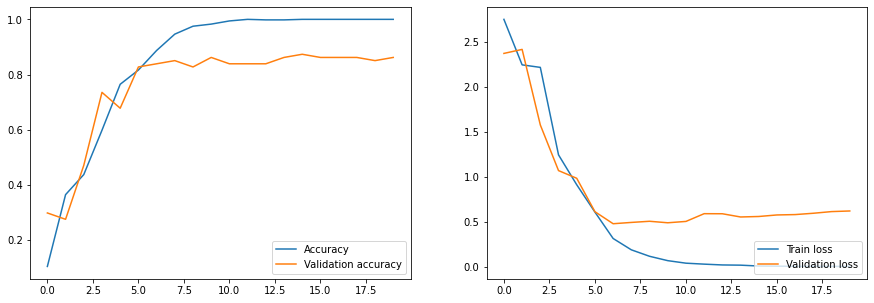

In [11]:
fig, sides = plt.subplots(1, 2, figsize=(15,5))

sides[0].plot(trained.history['accuracy'], label='Accuracy')
sides[0].plot(trained.history['val_accuracy'], label = 'Validation accuracy')
sides[0].legend(loc='lower right')


sides[1].plot(trained.epoch, trained.history["loss"], label="Train loss")
sides[1].plot(trained.epoch, trained.history["val_loss"], label="Validation loss")
sides[1].legend(loc='lower right')